In [2]:
import requests
from bs4 import BeautifulSoup
import csv

# Fungsi untuk mengambil data film dari Box Office Mojo
def scrape_box_office_mojo(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('div', class_='a-section imdb-scroll-table-inner')
    rows = table.find_all('tr')

    data = []
    for row in rows[1:]:
        cells = row.find_all('td')
        date = cells[0].get_text(strip=True)
        revenue = cells[3].get_text(strip=True)
        release = cells[5].get_text(strip=True)
        title = cells[6].get_text(strip=True)
        distributor = ''
        genre = ''
        # Mapping titles to distributors and genres
        if title == 'The Fall Guy':
            distributor = 'Universal Pictures International (UPI)'
            genre = 'Action Comedy Drama'
        elif title == 'The First Omen':
            distributor = 'Walt Disney Pictures'
            genre = 'Horror'
        elif title == 'Godzilla x Kong: The New Empire':
            distributor = 'Warner Bros'
            genre = 'Action Adventure Sci-Fi Thriller'
        elif title == 'Ghostbusters: Frozen Empire':
            distributor = 'Sony Pictures Releasing'
            genre = 'Adventure Comedy Fantasy Sci-Fi'
        elif title == 'Kung Fu Panda 4':
            distributor = 'PT Omega Film'
            genre = 'Action Adventure Animation Comedy Family Fantasy'
        elif title == 'The Holdovers':
            distributor = 'PT Omega Film'
            genre = 'Comedy Drama'
        elif title == 'Bob Marley: One Love':
            distributor = 'Paramount Pictures International'
            genre = 'Biography Drama Music'
        elif title == 'Argylle':
            distributor = 'Universal Pictures International (UPI)'
            genre = 'Action Comedy Thriller'
        elif title == 'Migration':
            distributor = 'PT Omega Film'
            genre = 'Adventure Animation Comedy Family'
        elif title == 'Night Swim':
            distributor = 'PT Omega Film'
            genre = 'Horror Thriller'

        data.append([date, revenue, release, title, distributor, genre])

    return data

# URL Box Office Mojo untuk film-film Indonesia tahun 2024
url = 'https://www.boxofficemojo.com/weekend/by-year/2024/?area=ID'

# Mengambil data film
film_data = scrape_box_office_mojo(url)

# Menyimpan data film dalam file CSV
with open('film_data_2024.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Tanggal', 'Pendapatan', 'Release', 'Judul', 'Distributor', 'Genre'])
    writer.writerows(film_data)


In [3]:
import pandas as pd

# Baca file CSV yang telah Anda buat sebelumnya
data = pd.read_csv('film_data_2024.csv')

# Kelompokkan data berdasarkan distributor dan hitung total pendapatan untuk setiap distributor
total_pendapatan_per_distributor = data.groupby('Distributor')['Pendapatan'].sum()

# Sortir distributor berdasarkan total pendapatan dalam urutan menurun
top_distributors = total_pendapatan_per_distributor.sort_values(ascending=False).head(5)

print("5 distributor film dengan pendapatan kotor tertinggi pada tahun 2024:")
print(top_distributors)


5 distributor film dengan pendapatan kotor tertinggi pada tahun 2024:
Distributor
Sony Pictures Releasing                                                            $859,938
PT Omega Film                             $582,426$1,599,027$15,772$23,277$18,541$63,061...
Warner Bros                                                                      $3,100,000
Universal Pictures International (UPI)                               $265,663$18,456$31,828
Walt Disney Pictures                                               $158,252$595,330$819,728
Name: Pendapatan, dtype: object


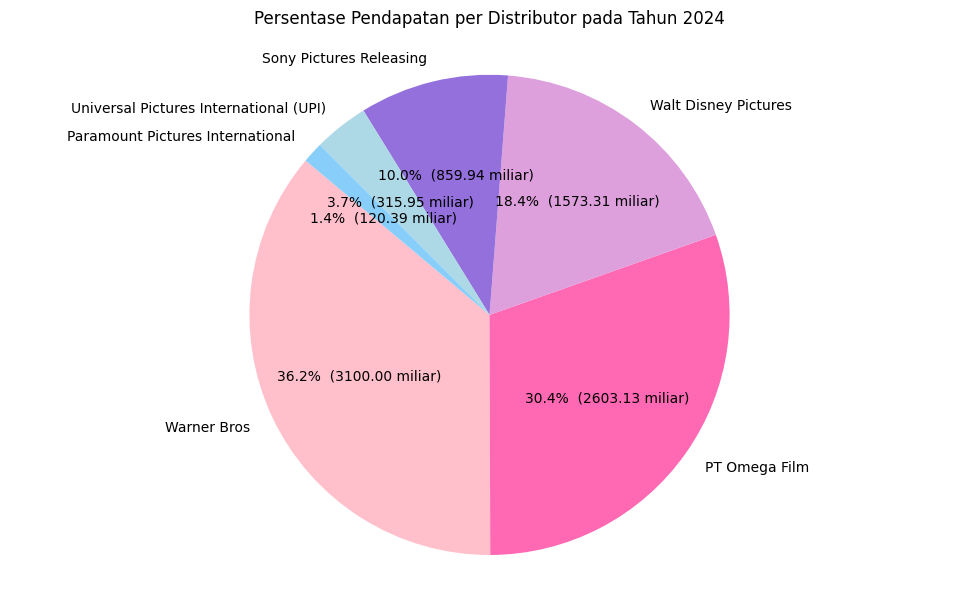

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data dari file CSV
df = pd.read_csv('film_data_2024.csv')

# Membersihkan kolom 'Pendapatan' agar hanya berisi angka
df['Pendapatan'] = df['Pendapatan'].replace('-', 0)

# Mengonversi kolom 'Pendapatan' ke tipe data float
df['Pendapatan'] = df['Pendapatan'].replace('[\$,]', '', regex=True).astype(float)

# Menghitung total pendapatan per distributor
revenue_by_distributor = df.groupby('Distributor')['Pendapatan'].sum().sort_values(ascending=False)

# Warna bertema pastel (pink, ungu, biru muda)
colors = ['#FFC0CB', '#FF69B4', '#DDA0DD', '#9370DB', '#ADD8E6', '#87CEFA', '#B0C4DE', '#00BFFF', '#1E90FF', '#6495ED']

# Membuat pie chart dengan warna pastel, jarak antara judul dan chart, dan besaran angka di setiap persen
plt.figure(figsize=(10, 6))
plt.pie(revenue_by_distributor, labels=revenue_by_distributor.index, autopct=autopct_format(revenue_by_distributor), startangle=140, colors=colors)
plt.title('Persentase Pendapatan per Distributor pada Tahun 2024', pad=20)  # Menambahkan jarak (pad) antara judul dan chart
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.tight_layout()

# Menampilkan pie chart
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Memuat data dari file CSV
df = pd.read_csv('film_data_2024.csv')

# Membersihkan kolom 'Pendapatan' agar hanya berisi angka
df['Pendapatan'] = df['Pendapatan'].replace('-', 0)

# Mengonversi kolom 'Pendapatan' ke tipe data float
df['Pendapatan'] = df['Pendapatan'].replace('[\$,]', '', regex=True).astype(float)

# Menghitung total pendapatan per distributor
revenue_by_distributor = df.groupby('Distributor')['Pendapatan'].sum().sort_values(ascending=False)

# Fungsi untuk menampilkan deskripsi film dari distributor yang dipilih
def display_movie_description(selected_distributor):
    clear_output(wait=True)  # Menghapus output sebelumnya
    selected_movies = df[df['Distributor'] == selected_distributor]
    if not selected_movies.empty:
        display(HTML(selected_movies.to_html(index=False)))
    else:
        print("Tidak ada film yang didistribusikan oleh", selected_distributor)
    display(dropdown)  # Menampilkan dropdown menu setelah menampilkan deskripsi film

# Dropdown menu untuk memilih distributor
dropdown_options = list(revenue_by_distributor.index)
dropdown_options.sort()  # Mengurutkan nama distributor
dropdown_options.insert(0, 'Pilih Distributor')

def on_dropdown_change(change):
    if change['name'] == 'value' and change['new'] != 'Pilih Distributor':
        display_movie_description(change['new'])

dropdown = widgets.Dropdown(
    options=dropdown_options,
    description='Distributor:',
    disabled=False,
)
dropdown.observe(on_dropdown_change)

# Menampilkan dropdown menu
display(dropdown)


Tanggal,Pendapatan,Release,Judul,Distributor,Genre
Mar 27-31,3100000.0,1,Godzilla x Kong: The New Empire,Warner Bros,Action Adventure Sci-Fi Thriller


Dropdown(description='Distributor:', index=6, options=('Pilih Distributor', 'PT Omega Film', 'Paramount Pictur…